In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# **Load Data**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ramsha275/ML_Datasets/main/ionosphere_data.csv')

In [4]:
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


# **Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.**

In [5]:
data.isnull().any()

feature1     False
feature2     False
feature3     False
feature4     False
feature5     False
feature6     False
feature7     False
feature8     False
feature9     False
feature10    False
feature11    False
feature12    False
feature13    False
feature14    False
feature15    False
feature16    False
feature17    False
feature18    False
feature19    False
feature20    False
feature21    False
feature22    False
feature23    False
feature24    False
feature25    False
feature26    False
feature27    False
feature28    False
feature29    False
feature30    False
feature31    False
feature32    False
feature33    False
feature34    False
label        False
dtype: bool

In [6]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
np.unique(data.feature2)

array([0])

In [8]:
data.sample(frac=0.4)
data.drop(columns=["feature2"] ,inplace=True,axis=0)

# **Split into 60 and 40 ratio.**

In [9]:
labels = data.pop("label")

In [10]:
data -= data.mean()
data /= data.std()

In [11]:
labels = pd.Series([0 if lbl == 'g' else 1 for lbl in labels]) 

In [12]:
data_len = len(data)
train_data = data.iloc[:data_len*60//100]
test_data = data.iloc[data_len*60//100:]
labels_len = len(labels)
train_labels = labels.iloc[:labels_len*60//100]
test_labels = labels.iloc[labels_len*60//100:]

# **Model : 1 hidden layers including 16 unit.  Train the Model with Epochs (100).**

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network = models.Sequential()
network.add(layers.Dense(16,activation="relu",input_shape=(len(train_data.columns),)))
# network.add(layers.Dense(13,activation="relu"))
network.add(layers.Dropout(0.5))

network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  %time MODEL = network.fit(train_data,train_labels,epochs=100,batch_size=128)

Epoch 1/100
2/2 [==============================] - 3s 7ms/step - loss: 0.9535 - acc: 0.4338
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8743 - acc: 0.5090
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8271 - acc: 0.5855
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8792 - acc: 0.5300
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 0.7850 - acc: 0.5442
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8208 - acc: 0.5090
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8076 - acc: 0.5858
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 0.7358 - acc: 0.5558
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 0.7352 - acc: 0.6372
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.7848 - acc: 0.5638
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 0.7187 

# **Evaluation Step**

In [14]:
loss , acc = network.evaluate(test_data,test_labels)

5/5 [==============================] - 0s 3ms/step - loss: 0.3645 - acc: 0.8936


# **Prediction**

In [15]:
prediction_test_data = test_data[test_labels == 1]
predictions = network.predict(prediction_test_data)
len(np.round(predictions))

22

# **Model : 2 hidden layers including 33 and 13 unit.  Train the Model with Epochs (80).**

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network1 = models.Sequential()
network1.add(layers.Dense(33,activation="relu",input_shape=(len(train_data.columns),)))
network1.add(layers.Dense(13,activation="relu"))
network1.add(layers.Dense(1,activation="sigmoid"))
network1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  %time MODEL1 = network1.fit(train_data,train_labels, validation_split=0.,epochs=80,batch_size=64)

Epoch 1/80
4/4 [==============================] - 0s 4ms/step - loss: 0.6876 - acc: 0.4828
Epoch 2/80
4/4 [==============================] - 0s 3ms/step - loss: 0.6594 - acc: 0.5199
Epoch 3/80
4/4 [==============================] - 0s 3ms/step - loss: 0.6229 - acc: 0.6193
Epoch 4/80
4/4 [==============================] - 0s 3ms/step - loss: 0.6062 - acc: 0.7438
Epoch 5/80
4/4 [==============================] - 0s 3ms/step - loss: 0.5888 - acc: 0.8138
Epoch 6/80
4/4 [==============================] - 0s 3ms/step - loss: 0.5718 - acc: 0.8288
Epoch 7/80
4/4 [==============================] - 0s 4ms/step - loss: 0.5478 - acc: 0.8623
Epoch 8/80
4/4 [==============================] - 0s 3ms/step - loss: 0.5330 - acc: 0.8529
Epoch 9/80
4/4 [==============================] - 0s 3ms/step - loss: 0.5170 - acc: 0.8578
Epoch 10/80
4/4 [==============================] - 0s 3ms/step - loss: 0.5015 - acc: 0.8541
Epoch 11/80
4/4 [==============================] - 0s 3ms/step - loss: 0.4784 - acc: 0.86

# **Training loss visualization**

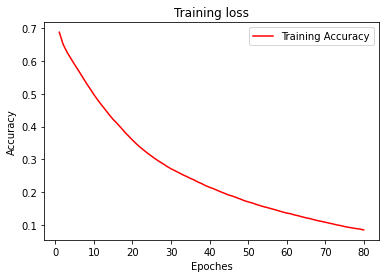

In [23]:
history_dict = MODEL1.history
acc_values = history_dict['loss']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'r',label="Training Accuracy")
plt.title('Training loss')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Evaluation Step**

In [18]:
loss , acc = network1.evaluate(test_data,test_labels)

5/5 [==============================] - 0s 2ms/step - loss: 0.0990 - acc: 0.9787


# **Predictions**

In [28]:
prediction_test_data = test_data
predictions = network1.predict(prediction_test_data)

In [29]:
print(f"Alhumdullah got accuracy upto {acc*100}%")

Alhumdullah got accuracy upto 97.8723406791687%


In [31]:
predictions = np.round(predictions)
test_labels2 = test_labels

In [32]:
tf.math.confusion_matrix(
    test_labels2, predictions, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[118,   1],
       [  2,  20]], dtype=int32)>